In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('loan_history.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139877 entries, 0 to 139876
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          139877 non-null  int64  
 1   customer_id                 139877 non-null  int64  
 2   loan_amount                 139877 non-null  int64  
 3   funded_amount               139877 non-null  int64  
 4   investor_funds              139877 non-null  float64
 5   term                        139877 non-null  int64  
 6   interest_rate               139877 non-null  float64
 7   installment                 139877 non-null  float64
 8   grade                       139877 non-null  object 
 9   sub_grade                   139877 non-null  object 
 10  home_ownership              139877 non-null  object 
 11  annual_income               139877 non-null  float64
 12  income_verification_status  139877 non-null  object 
 13  loan_issue_dat

In [4]:
df.columns

Index(['id', 'customer_id', 'loan_amount', 'funded_amount', 'investor_funds',
       'term', 'interest_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_income', 'income_verification_status',
       'loan_issue_date', 'loan_status', 'purpose', 'state',
       'debt_to_income_ratio', 'delinquencies_2yrs', 'earliest_credit_line',
       'public_record', 'outstanding_principal', 'total_pymnt',
       'last_credit_pull_d', 'last_pymnt_d', 'total_obligation',
       'recovery_rate', 'loan_age', 'pct_loan_age', 'loan_cat',
       'installment_to_inc', 'credit_history_length'],
      dtype='object')

In [5]:
# Dropping unnecessary columns
# df.drop(columns=['recovery_rate','id','customer_id'], inplace=True)
df.drop(columns=['recovery_rate','id','customer_id', 'total_pymnt', 'last_credit_pull_d',
       'last_pymnt_d', 'total_obligation', 'loan_age', 'pct_loan_age', 'loan_status', 'loan_issue_date', 'earliest_credit_line', 
       'interest_rate',  
       'outstanding_principal'
        ], inplace=True)

Accuracy: 0.7620817843866171

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.20      0.30      2690
           1       0.79      0.94      0.86     19975
           2       0.59      0.37      0.45      5311

    accuracy                           0.76     27976
   macro avg       0.66      0.51      0.54     27976
weighted avg       0.73      0.76      0.73     27976



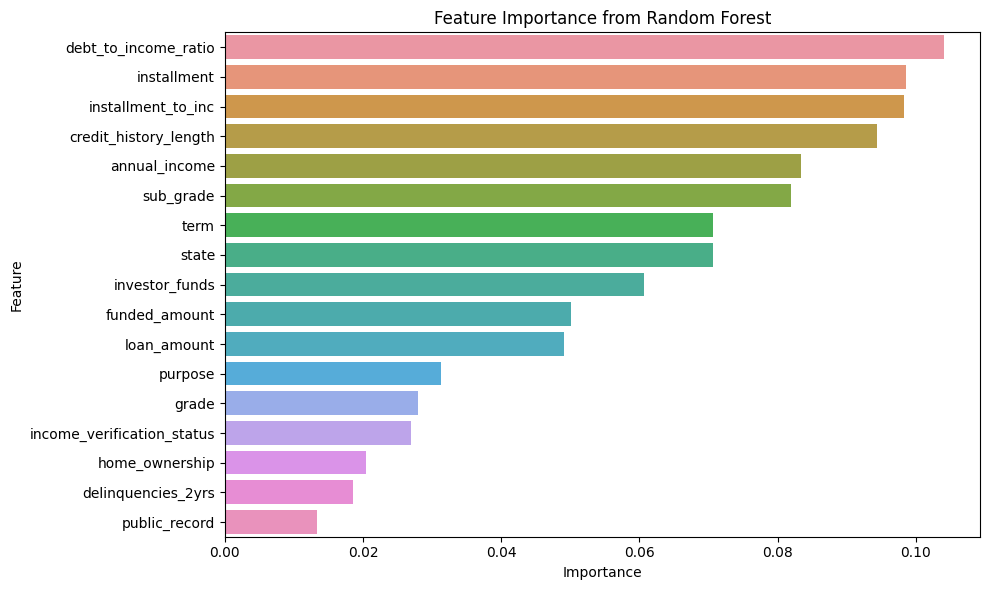

In [6]:
999
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns




# 3. Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'loan_cat':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target column
target_le = LabelEncoder()
df['loan_cat'] = target_le.fit_transform(df['loan_cat'])

# 4. Feature-target split
X = df.drop("loan_cat", axis=1)
y = df["loan_cat"]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# 9. Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_imp_df)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()
